/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 2.1662e-04 - val_loss: 1.9928e-05
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 1.5834e-05 - val_loss: 7.8644e-06
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 4.0122e-06 - val_loss: 8.3040e-07
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 6.0772e-07 - val_loss: 1.5047e-07
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.1606e-08 - val_loss: 5.4624e-09
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 7.5992e-09 - val_loss: 2.1880e-09
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.4667e-09 - val_loss: 2.0417e-10
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 1.4072e-10 - val_loss: 7.6896e-11
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.6999e-11 - val_loss: 3.3340e-12
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.8639e-12 - val_loss: 2.5183e-13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


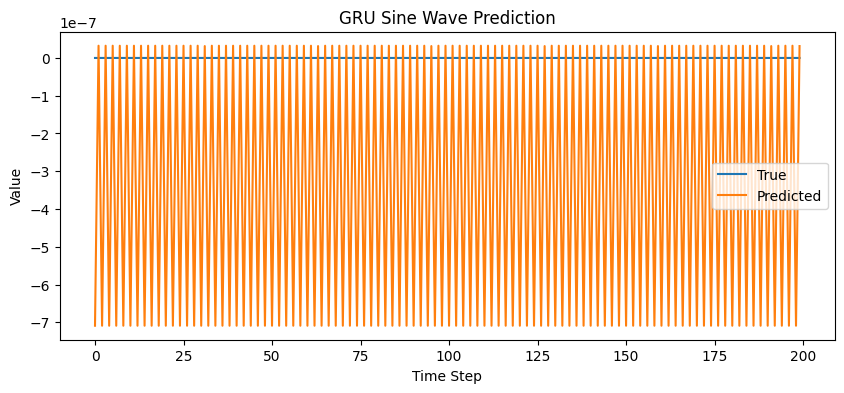

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Generate sine wave data
def generate_sine_wave(seq_length, total_series):
    total_points = total_series * seq_length + 1
    x = np.linspace(0, total_series * np.pi, total_points)
    y = np.sin(x)
    y = y.reshape(-1, 1)

    X_data = []
    y_data = []

    # Create sequences
    for i in range(total_series):
        start_index = i * seq_length

        end_index = start_index + seq_length
        if end_index + 1 <= len(y):
            X_data.append(y[start_index:end_index])
            y_data.append(y[end_index])
        else:
            break

    # Convert lists to numpy arrays
    X_data = np.array(X_data)
    y_data = np.array(y_data)

    return X_data, y_data

# Parameters
SEQ_LENGTH = 50
TOTAL_SERIES = 1000

# Create dataset
X, y = generate_sine_wave(SEQ_LENGTH, TOTAL_SERIES)

# Split into training and test sets
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build GRU model
model = Sequential([
    GRU(64, input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict
predictions = model.predict(X_test)

# Plot
# We are comparing the predicted value with the actual next value
plt.figure(figsize=(10, 4))
plt.plot(y_test[:, 0], label="True")
plt.plot(predictions[:, 0], label="Predicted")
plt.legend()
plt.title("GRU Sine Wave Prediction")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.show()